# 2. Directional Coupler Transmission
Term Paper for 6.S986: Silicon Photonics (Fall 2022). By Shoumik Chowdhury (@shoumikdc)

In [1]:
""" Import Relevant Packages """
import numpy as np
import h5py
import matplotlib.pyplot as plt

""" Some constants """
μm = 1e-6; nm = 1e-9;

In [50]:
# Export plot data from Matlab file
f_init = h5py.File('DirCoup_T_Initial.mat','r')
f_opt = h5py.File('DirCoup_T_Optimized.mat','r')

<HDF5 file "DirCoup_T_Initial.mat" (mode r)>
IL at 50:50 point: -0.06931683633896965
<HDF5 file "DirCoup_T_Optimized.mat" (mode r)>
IL at 50:50 point: -1.0990706010992874


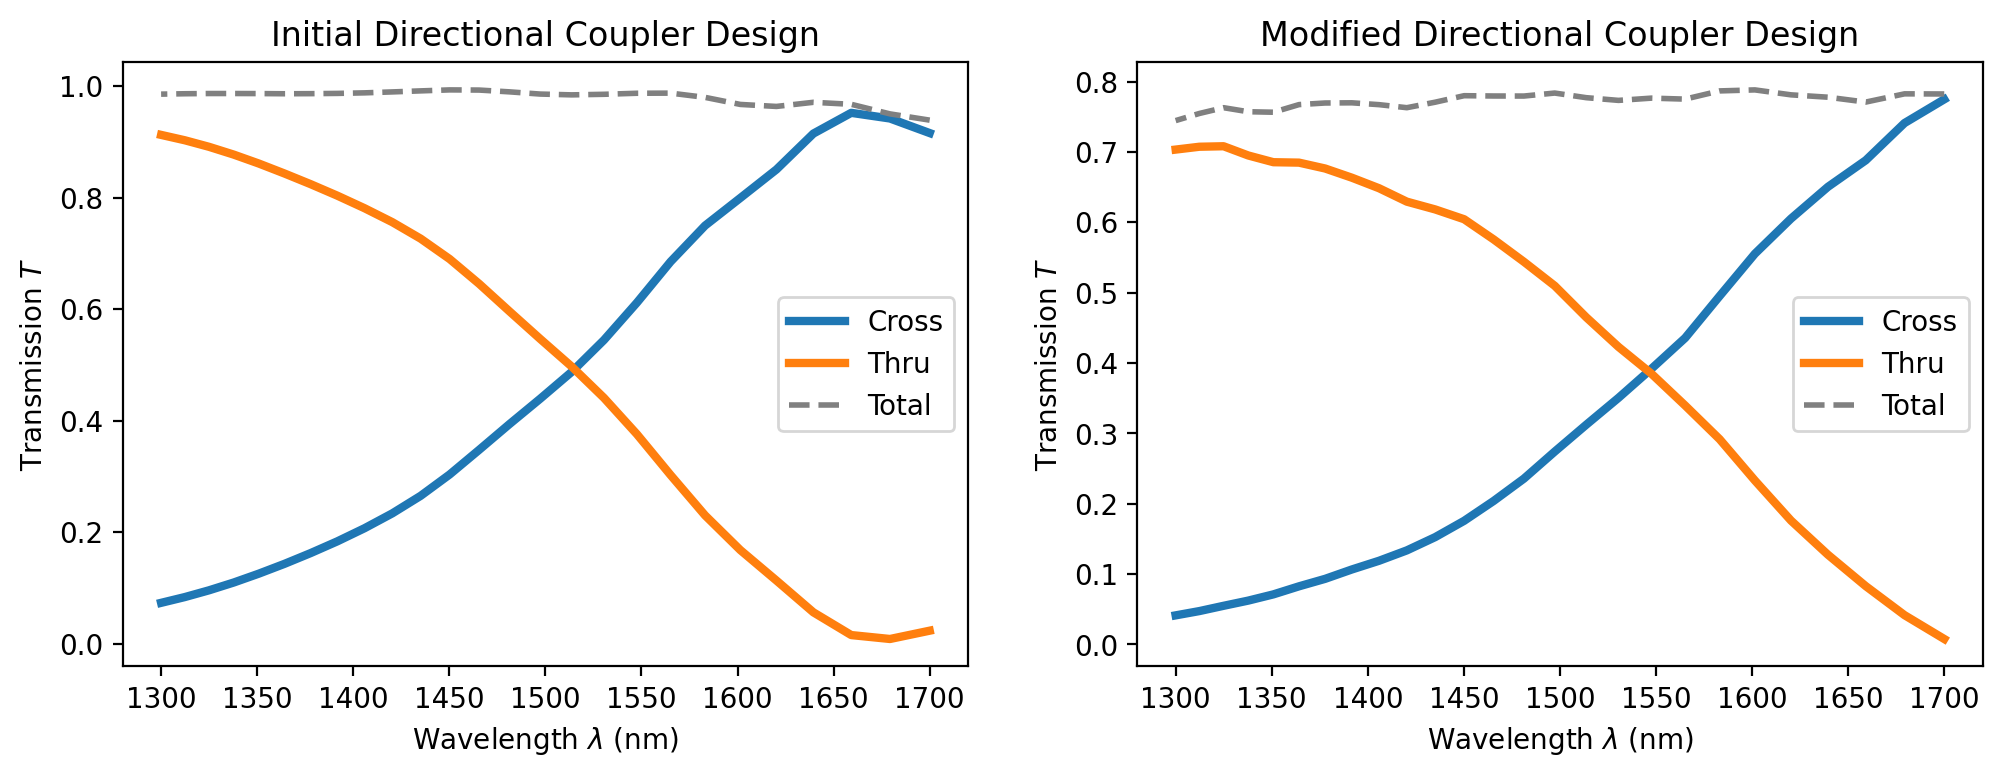

In [99]:
fig, ax = plt.subplots(1, 2, dpi=200, figsize = (12, 4))


files = [f_init, f_opt]
idx50_50 = [10, 8]

for idx, f in enumerate(files):
    wavelength = np.array(f['lum']['x0']).flatten() / nm
    cross = np.array(f['lum']['y0']).flatten()
    thru = np.array(f['lum']['y1']).flatten()
    
    total = cross + thru
    
    ax[idx].plot(wavelength, cross, linewidth=3, label = "Cross")
    ax[idx].plot(wavelength, thru, linewidth=3, label = "Thru")
    ax[idx].plot(wavelength, total, '--', linewidth=2, c="grey", label = "Total")
    ax[idx].set_ylabel(r"Transmission $T$")
    ax[idx].set_xlabel(r"Wavelength $\lambda$ (nm)")
    ax[idx].legend()
    
    IL = 10 * np.log10(total)
    print(f)
    print("IL at 50:50 point:", IL[idx50_50[idx]])
    
ax[0].set_title("Initial Directional Coupler Design");
ax[1].set_title("Modified Directional Coupler Design");